In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import string
import time
import logging
import numpy as np
import importlib


# import run_a_star_iter_ginkgo as run_Astar

In [3]:
# import jet_trellis_invM as jet_trellis
# import run_physics_experiment_invM as rpe
# import jet_node_invM as jet_node
# # import likelihood
# import hierarchical_trellis
# import hierarchical_trellis_node

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse
from matplotlib import gridspec

import matplotlib
matplotlib.rc('font',**{'family':'serif','serif':['Times']})
matplotlib.rc('text', usetex=True) 
matplotlib.rcParams.update({'font.size': 10})

In [5]:
# from utils import get_logger
# logger = get_logger(level=logging.WARNING)

In [5]:
# importlib.reload(hierarchical_trellis)
# importlib.reload(hierarchical_trellis_node)
# importlib.reload(jet_node)
# importlib.reload(jet_trellis)
# importlib.reload(rpe)

<module 'run_physics_experiment_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/hierarchical-trellis/src/run_physics_experiment_invM.py'>

In [7]:
# from utils import get_logger
# logger = get_logger(level=logging.WARNING)

In [4]:
def load_jets(filename):
    root_dir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/hierarchical-trellis/src/data/invMassGinkgo/"
    
#     root_dir = "/Users/sebastianmacaluso/Documents/PrinceData/invMassGinkgo/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth, BS, Greedy = pickle.load(fd, encoding='latin-1')
    return Truth, BS, Greedy

In [5]:
label = "TruthBSGreedy_Trellis".split("_")[1]

In [6]:
plotDir = "plots/"

In [7]:
# gt_jets, bs_jets, greedy_jets = load_jets("TruthBSGreedy_Trellis")
# gt_jets, bs_jets, greedy_jets = load_jets("TruthBSmaxGreedy_9_leaves")

## Test dataset

In [6]:
def load_jets(NleavesMin=4):
    indir = "data/"
    in_filename = os.path.join(indir, "test_"+str(NleavesMin)+"_jets.pkl")
    with open(in_filename, "rb") as fd:
        gt_jets = pickle.load(fd, encoding='latin-1')
    return gt_jets

In [7]:
gt_jets = load_jets(NleavesMin=4)

In [8]:
len(gt_jets)

10

In [13]:
gt_jets[0]

{'root_id': 0,
 'tree': array([[ 1,  6],
        [ 2,  5],
        [ 3,  4],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1]]),
 'content': array([[401.1234224 , 230.94010768, 230.94010768, 230.94010768],
        [314.60120085, 180.422586  , 175.23301597, 188.33846754],
        [ 81.00655526,  43.5310513 ,  45.61659103,  50.40192677],
        [ 40.27664947,  21.97625825,  21.18900353,  26.18085261],
        [ 40.72990009,  21.55478998,  24.42758429,  24.22107061],
        [233.59463599, 136.89152919, 129.61641959, 137.93653502],
        [ 86.52222155,  50.51752167,  55.7070917 ,  42.60164013]]),
 'LambdaRoot': tensor(1.5000),
 'Lambda': tensor(1.5000),
 'Delta_0': tensor(900.),
 'pt_cut': 16.0,
 'algorithm': 'truth',
 'deltas': array([900.        , 243.61775208,  45.8819809 ,   0.        ,
          0.        ,   0.        ,   0.        ]),
 'draws': array([None, tensor(0.2707), tensor(0.1883), tensor(0.1055),
        tensor(0.5235), tensor(0.0033), tensor(0.0767

In [22]:
iStart = [i for i in range(len(gt_jets)) if 2<=len(gt_jets[i]["leaves"])<3][0]

In [23]:
testset=gt_jets[iStart]

In [1]:
import wandb

In [2]:
wandb.login()

True

In [3]:
# from absl import app

In [2]:
import numpy as np
min(np.array([[1,2,5]]))

array([1, 2, 5])

In [4]:
import pickle
import os
import logging
import numpy as np
import sys

# sys.path.append('../')

from iter_trellis import IterCCTrellis, IterJetTrellis
from trellis.iter_trellis import all_two_partitions, k_random_2_cuts, top_k_of_n_2_cuts
# from trellis.tree import Tree
# from trellis.build_graphs import build_graph_from

import wandb


from absl import flags
from absl import logging
from absl import app

In [5]:
FLAGS = flags.FLAGS

flags.DEFINE_integer('max_iter', 1000000000000, 'iterations')
flags.DEFINE_integer('max_nodes', 10000000, 'nodes')
flags.DEFINE_string('dataset', None, 'dataset file')
flags.DEFINE_string('trellis_class', 'IterJetTrellis', 'dataset file')
flags.DEFINE_string('exp_name', 'AStar', 'name')
flags.DEFINE_string('output', 'exp_out', 'output directory')
flags.DEFINE_integer('tree_num', 0, '')
flags.DEFINE_integer('num_points', 12, '')
flags.DEFINE_integer('seed', 42, '')
flags.DEFINE_string('child_func', 'all_two_partitions', 'function used to get children when initializing nodes')
flags.DEFINE_integer('num_repeated_map_values', 1, 'number of times the same MAP value is returned before halting')
flags.DEFINE_integer('propagate_values_up', 0, 'whether to propagate f,g,h values during trellis extension.')


# flags.DEFINE_string('graph_input', None, 'The data file to build the graph from in either xcluster or npy format.')
# flags.DEFINE_string('graph_input_format', 'xcluster', 'Input data format = {xcluster|npy}')
# flags.DEFINE_integer('graph_num_neighbors', -1, 'The number of neighbors to give each point in the graph. -1 to do fully connected.')
# flags.DEFINE_integer('unit_norm', 1, 'Whether or not to unit norm the vectors (should always be true)')
# flags.DEFINE_integer('batch_size', 100, 'Batchsize when computing nearest neighbors.')
# flags.DEFINE_integer('graph_num_classes', 3, 'Number of classes of points to use.')
# flags.DEFINE_float('graph_percent_of_points_for_classes', 0.20, 'Number of classes of points to use.')
# flags.DEFINE_boolean('build_cc_graph', True, '')


flags.DEFINE_integer('get_children_k', 5, '')
flags.DEFINE_integer('get_children_n', 3, '')
flags.DEFINE_integer('get_children_exact_size', 10, '')
flags.DEFINE_integer('get_children_num_tries', 2, '')
flags.DEFINE_integer('iter_approx_max_iter', 3, '')
flags.DEFINE_integer('search_cap_size', 40, '')




logging.set_verbosity(logging.INFO)

In [15]:
class flags(object):
    
    def __init__(self,max_iter, max_nodes,dataset, trellis_class, exp_name, output , tree_num, num_points, seed, child_func, num_repeated_map_values, propagate_values_up):
        self.max_iter= max_iter
        self.max_nodes =max_nodes
        self.dataset = dataset
        self.trellis_class = trellis_class
        self.exp_name= exp_name
        self.output = output
        self.tree_num = tree_num
        self.num_points = num_points
        self.seed= seed
        self.child_func = child_func
        self.num_repeated_map_values = num_repeated_map_values
        self. propagate_values_up = propagate_values_up
        

    

In [16]:
FLAGS= flags(max_iter = 10000000,max_nodes=10000000, dataset=None, trellis_class = 'IterJetTrellis', exp_name= 'AStar', output= 'exp_out' , tree_num=0, num_points =12, seed=42, child_func='all_two_partitions', num_repeated_map_values=1, propagate_values_up=0)

In [ ]:
wandb.init(project="%s" % (FLAGS.exp_name),
           config={
               "batch_size": 128,
               "learning_rate": 0.01,
               "dataset": "CIFAR-100",
           })

In [ ]:
%%wandb

In [14]:
def main(argv):
    logging.info('Running with args %s', str(argv))

    wandb.init(project=
              )
    wandb.config.update(flags.FLAGS)
    outprefix = os.path.join(FLAGS.output, wandb.env.get_project(), os.environ.get(wandb.env.SWEEP_ID, 'solo'),
                             wandb.env.get_run())
    logging.info('outprefix is %s', outprefix)
    os.makedirs(outprefix, exist_ok=True)
    np.random.seed(FLAGS.seed)


#     graph, _, labels, _ = build_graph_from(FLAGS, FLAGS.tree_num)
#     dataset_name = os.path.basename(FLAGS.graph_input)

    logging.info('Running on a dataset (%s) with %s points from %s gt clusters', dataset_name, labels.shape[0],
                 np.unique(labels).shape[0])

    assert labels.shape[0] == FLAGS.num_points

#     wandb.log({
#         'tree_num': FLAGS.tree_num,
#         'dataset_name': dataset_name,
#         'num_points': FLAGS.num_points,
#         'num_gt_clusters': labels.shape[0]
#     })

    if FLAGS.trellis_class == 'IterJetTrellis' or FLAGS.trellis_class == 'GreedyIterCCTrellis':
        trellis = IterJetTrellis(leaves = gt_jets[0]['leaves'], propagate_values_up=FLAGS.propagate_values_up, max_nodes=FLAGS.max_nodes,  min_invM=gt_jets[0]['pt_cut'], Lambda= gt_jets[0]['Lambda'], LambdaRoot=gt_jets[0]['LambdaRoot'])
#         trellis = IterCCTrellis(graph, propagate_values_up=FLAGS.propagate_values_up, max_nodes=FLAGS.max_nodes)


        #Define _get_children as all 2 partitions or top k of n 2 cuts
        if FLAGS.child_func == 'all_two_partitions':
            _get_children = all_two_partitions
        else:
            def _get_children(elem):
                return top_k_of_n_2_cuts(elem, graph=trellis.graph, all_pairs_max_size=15)
        trellis._get_children = _get_children

    else:
        raise Exception("Unknown trellis %s" % FLAGS.trellis_class)

    wandb.log({'trellis_class': FLAGS.trellis_class,
               'child_func': FLAGS.child_func,
               'propagate_values_up': FLAGS.propagate_values_up})

    # run search.
    if FLAGS.trellis_class == 'IterJetTrellis' or FLAGS.trellis_class == 'GreedyIterCCTrellis' :
        hc, f = trellis.execute_search(num_matches=FLAGS.num_repeated_map_values)
    elif FLAGS.trellis_class == 'Greedy':
        hc, f = trellis.execute_search()

    wandb.log({'a_star_map': f})
    print('FINAL HC:', hc)
    print('FINAL f:', f)

In [16]:
app.run(main)

FATAL Flags parsing error: Unknown command line flag 'f'
Pass --helpshort or --helpfull to see help on flags.
E1029 15:56:54.515222 4480251328 ultratb.py:152] Internal Python error in the inspect module.
Below is the traceback from this internal error.

I1029 15:56:54.516530 4480251328 ultratb.py:1185] 
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/absl/app.py", line 158, in parse_flags_with_usage
    return FLAGS(args)
  File "/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/absl/flags/_flagvalues.py", line 633, in __call__
    name, value, suggestions=suggestions)
absl.flags._exceptions.UnrecognizedFlagError: Unknown command line flag 'f'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-243392e41e8e>", line 1, in <module>
    app.run(main)
  File "/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/absl/app.py", line 293, in run
    flags_parser,
  File "/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/absl/app.py", line 362,

TypeError: object of type 'NoneType' has no len()

In [37]:
# FLAGS = flags.FLAGS

# logging.set_verbosity(logging.INFO)

In [13]:
# app.run(run_Astar.main)

In [23]:
#Check if there is any entry for the splitting log LH with positive values. This would mean the LH>1
for ijet in range(len(gt_jets)):
    pos = [gt_jets[ijet]["logLH"][i] for i in range(len(gt_jets[ijet]["logLH"])) if gt_jets[ijet]["logLH"][i] >0]
    if pos!=[]:
        print(pos)

In [20]:
bs_jets = np.asarray([entry[0] for entry in bs_jets]) 

In [26]:
np.log(1-np.exp(-1.5))

-0.25248245892545396

In [28]:
np.log(4)

1.3862943611198906

In [24]:
gt_jets[0]

{'root_id': 0,
 'tree': array([[ 1, 14],
        [ 2, 13],
        [ 3, 12],
        [ 4, 11],
        [ 5, 10],
        [ 6,  9],
        [ 7,  8],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [15, 16],
        [-1, -1],
        [-1, -1]]),
 'content': array([[401.1234224 , 230.94010768, 230.94010768, 230.94010768],
        [309.52302075, 179.87132722, 178.36989079, 176.44572323],
        [298.21950099, 173.75326464, 172.68533187, 168.91089618],
        [197.48688541, 121.30629024, 112.2744643 , 107.74501025],
        [177.05831638, 107.58013355, 102.17675728,  96.49321179],
        [174.0111227 , 105.6801559 , 100.42803104,  94.87698609],
        [157.20260791,  95.69725393,  90.23789822,  85.99148259],
        [150.28670557,  91.454086  ,  86.32935603,  82.1809349 ],
        [  6.91591023,   4.24317273,   3.90854673,   3.810552  ],
        [ 16.80851689,   9.98290325,  10.19013404,   8.88550465]

## Tests

In [203]:
def load_jets(root_dir, filename):
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth  = pickle.load(fd, encoding='latin-1')
    return Truth

In [204]:
rootDir = "../../TreeAlgorithms/data/invMassGinkgo/Truth/"

In [22]:
# testset = load_jets(rootDir,"tree_W_100_m2min_100.0_rate01_3.0_1.5")
testset =gt_jets

In [18]:
iStart = [i for i in range(len(testset)) if 9<=len(testset[i]["leaves"])<10][0]

In [19]:
iStart

0

In [20]:
len(gt_jets[0]['leaves'])

9

In [208]:
from utils import get_logger
logger = get_logger(level=logging.DEBUG)

In [23]:
input_jet = testset[iStart]

In [24]:
a_trellis = jet_trellis.JetTrellis()

In [25]:
""" Create trellis"""
a_trellis.create_from_jet(input_jet)

In [28]:
len(a_trellis.elements_2_node)

511

In [29]:
"""Compute MAP (MLE), partition function Z"""
map_energy, Z = np.float64(a_trellis.compute_map_tree())

ValueError: too many values to unpack (expected 2)

In [34]:
NleavesMin = 3
NleavesMax = 4
MaxNjets = 1
gt_jets = testset[iStart:iStart+1]
""" Keep only trees with leaves between NleavesMin and NleavesMax"""
smallJetIndex =[i for i,gt_jet in enumerate(gt_jets)  if NleavesMin<=len(gt_jet["leaves"])<NleavesMax]


results = {"Z":[], "trellis_MLE":[], "RunTime":[]}


start = time.time()

if len(smallJetIndex)>0:

    GT_jets = np.asarray(gt_jets)[smallJetIndex]
    
    """ Total number of trees to run the trellis"""
    totJets = np.min([MaxNjets,len(smallJetIndex)])

    for m in range(totJets):

        if m%5==0:
            print("Creating trellis for jet #",m)

        """ Create and fill the trellis"""
        trellis, Z, map_energy,Ntrees,  totTime = rpe.compare_map_gt_and_bs_trees(GT_jets[m])

        results["Z"].append(Z)
        results["trellis_MLE"].append(map_energy)
        

print("Total time = ", time.time() - start)

Total time =  0.0001678466796875


In [35]:
len(trellis.elements_2_node)

511

In [36]:
trellis.elements_2_node

{frozenset({'b'}): HierarchicalTrellisNode: frozenset({'b'}),
 frozenset({'e'}): HierarchicalTrellisNode: frozenset({'e'}),
 frozenset({'c'}): HierarchicalTrellisNode: frozenset({'c'}),
 frozenset({'h'}): HierarchicalTrellisNode: frozenset({'h'}),
 frozenset({'i'}): HierarchicalTrellisNode: frozenset({'i'}),
 frozenset({'d'}): HierarchicalTrellisNode: frozenset({'d'}),
 frozenset({'g'}): HierarchicalTrellisNode: frozenset({'g'}),
 frozenset({'f'}): HierarchicalTrellisNode: frozenset({'f'}),
 frozenset({'a'}): HierarchicalTrellisNode: frozenset({'a'}),
 frozenset({'b', 'e'}): HierarchicalTrellisNode: frozenset({'b', 'e'}),
 frozenset({'b', 'c'}): HierarchicalTrellisNode: frozenset({'b', 'c'}),
 frozenset({'b', 'h'}): HierarchicalTrellisNode: frozenset({'b', 'h'}),
 frozenset({'b', 'i'}): HierarchicalTrellisNode: frozenset({'b', 'i'}),
 frozenset({'b', 'd'}): HierarchicalTrellisNode: frozenset({'b', 'd'}),
 frozenset({'b', 'g'}): HierarchicalTrellisNode: frozenset({'b', 'g'}),
 frozenset

## FIND MAP and Z - ONLY TRELLIS

In [29]:
def load_jets(NleavesMin=5):
    indir = "data/invMassGinkgo/"
    in_filename = os.path.join(indir, "test_"+str(NleavesMin)+"_jets.pkl")
    with open(in_filename, "rb") as fd:
        gt_jets = pickle.load(fd, encoding='latin-1')
    return gt_jets

In [30]:
gt_jets = load_jets()

In [37]:
def runTrellisOnly(gt_jets, 
#                bs_jets, 
#                greedy_jets,
               NleavesMin =3, 
               NleavesMax= 4, 
               MaxNjets = 1
              ):
    
    """Create and fill the trellis for a given set of leaves
    Args: 
    gt_jets : truth level jet trees.
    bs_jets: beam seach jet trees.
    greedy_jets: greedy jet trees.
    NleavesMin: minimum number of leaves to select jet trees
    NleavesMax: maximum number of leaves to select jet trees
    MaxNjets: maximum number of jet to run the trellis code.
    
    Returns:
    results: dictionary with the following {key:values}
                Z: partition functions,
                trellis_MLE: MLE, 
                RunTime: time for each tree
                totJets": total number of trees
                gt_llh: truth level trees llh
                bs_llh: beam search trees llh
                gd_llh: greedy trees llh
                
    trellis
    """
    
    """ Keep only trees with leaves between NleavesMin and NleavesMax"""
    smallJetIndex =[i for i,gt_jet in enumerate(gt_jets)  if NleavesMin<=len(gt_jet["leaves"])<NleavesMax]
            
    
    results = {"Z":[], "trellis_MLE":[], "RunTime":[], "Ntrees":[]}
    
    if len(smallJetIndex)>0:
        
        GT_jets = np.asarray(gt_jets)[smallJetIndex]
#         BSO_jet = bs_jets[smallJetIndex]
#         Greedy_jet = greedy_jets[smallJetIndex]
        
        """ Total number of trees to run the trellis"""
        totJets = np.min([MaxNjets,len(smallJetIndex)])

        results["totJets"] = totJets
        results["Nleaves"] = [len(GT_jets[m]["leaves"]) for m in range(totJets)]
        results["gt_llh"]= [np.sum(GT_jets[m]["logLH"]) for m in range(totJets)]
#         results["bs_llh"]=  [np.sum(BSO_jet[m]["logLH"]) for m in range(totJets)]
#         results["gd_llh"]=  [np.sum(Greedy_jet[m]["logLH"]) for m in range(totJets)]


        for m in range(totJets):

            if m%50==0:
                print("Creating trellis for jet #",m)
                
            startTime = time.time()

            """ Create and fill the trellis"""
            trellis, Z, map_energy, Ntrees,  totTime = rpe.compare_map_gt_and_bs_trees(GT_jets[m])

            results["Z"].append(Z)
            results["trellis_MLE"].append(map_energy)
            results["Ntrees"].append(Ntrees)

            endTime = time.time() - startTime
            results["RunTime"].append(endTime)

    else:
        print("There are no jets in the dataset with the required number of leaves ")
        
#     print("results = ", results)
        
    return results, trellis

In [56]:
NleavesMin =9
NleavesMax=10
MaxNjets = 1

start = time.time()
results10, trellis10 =  runTrellisOnly(gt_jets, 
               NleavesMin =NleavesMin, 
               NleavesMax= NleavesMax, 
               MaxNjets = MaxNjets)

print("Total time = ", time.time() - start)

Creating trellis for jet # 0
Total time =  2.320655107498169


In [57]:
len(trellis10.elements_2_node)

511

In [55]:
frozenset(['b','c','a'])

frozenset({'a', 'b', 'c'})

In [49]:
trellis10.elements_2_node

{frozenset({'b'}): HierarchicalTrellisNode: frozenset({'b'}),
 frozenset({'a'}): HierarchicalTrellisNode: frozenset({'a'}),
 frozenset({'d'}): HierarchicalTrellisNode: frozenset({'d'}),
 frozenset({'c'}): HierarchicalTrellisNode: frozenset({'c'}),
 frozenset({'a', 'b'}): HierarchicalTrellisNode: frozenset({'b', 'a'}),
 frozenset({'b', 'd'}): HierarchicalTrellisNode: frozenset({'b', 'd'}),
 frozenset({'b', 'c'}): HierarchicalTrellisNode: frozenset({'b', 'c'}),
 frozenset({'a', 'd'}): HierarchicalTrellisNode: frozenset({'a', 'd'}),
 frozenset({'a', 'c'}): HierarchicalTrellisNode: frozenset({'a', 'c'}),
 frozenset({'c', 'd'}): HierarchicalTrellisNode: frozenset({'d', 'c'}),
 frozenset({'a',
            'b',
            'd'}): HierarchicalTrellisNode: frozenset({'b', 'a', 'd'}),
 frozenset({'a',
            'b',
            'c'}): HierarchicalTrellisNode: frozenset({'b', 'a', 'c'}),
 frozenset({'b',
            'c',
            'd'}): HierarchicalTrellisNode: frozenset({'b', 'd', 'c'}),
 f

In [35]:
results10

{'Z': [-25.450608960062443, -24.70136312579796, -26.18017755472025],
 'trellis_MLE': [-27.548423454516815, -25.926422782307256, -26.94947351154468],
 'RunTime': [0.04524517059326172, 0.03405475616455078, 0.03861403465270996],
 'Ntrees': [90.0, 90.0, 90.0],
 'totJets': 3,
 'Nleaves': [5, 5, 5],
 'gt_llh': [-29.1822566986084, -26.888334274291992, -26.94947361946106]}

# MAP and partition function Z

In [13]:
def runTrellis(gt_jets, 
               bs_jets, 
               greedy_jets,
               NleavesMin =3, 
               NleavesMax= 4, 
               MaxNjets = 1
              ):
    
    """Create and fill the trellis for a given set of leaves
    Args: 
    gt_jets : truth level jet trees.
    bs_jets: beam seach jet trees.
    greedy_jets: greedy jet trees.
    NleavesMin: minimum number of leaves to select jet trees
    NleavesMax: maximum number of leaves to select jet trees
    MaxNjets: maximum number of jet to run the trellis code.
    
    Returns:
    results: dictionary with the following {key:values}
                Z: partition functions,
                trellis_MLE: MLE, 
                RunTime: time for each tree
                totJets": total number of trees
                gt_llh: truth level trees llh
                bs_llh: beam search trees llh
                gd_llh: greedy trees llh
                
    trellis
    """
    
    """ Keep only trees with leaves between NleavesMin and NleavesMax"""
    smallJetIndex =[i for i,gt_jet in enumerate(gt_jets)  if NleavesMin<=len(gt_jet["leaves"])<NleavesMax]
            
    
    results = {"Z":[], "trellis_MLE":[], "RunTime":[], "Ntrees":[]}
    
    if len(smallJetIndex)>0:
        
        GT_jets = np.asarray(gt_jets)[smallJetIndex]
        BSO_jet = bs_jets[smallJetIndex]
        Greedy_jet = greedy_jets[smallJetIndex]
        
        """ Total number of trees to run the trellis"""
        totJets = np.min([MaxNjets,len(smallJetIndex)])

        results["totJets"] = totJets
        results["Nleaves"] = [len(GT_jets[m]["leaves"]) for m in range(totJets)]
        results["gt_llh"]= [np.sum(GT_jets[m]["logLH"]) for m in range(totJets)]
        results["bs_llh"]=  [np.sum(BSO_jet[m]["logLH"]) for m in range(totJets)]
        results["gd_llh"]=  [np.sum(Greedy_jet[m]["logLH"]) for m in range(totJets)]


        for m in range(totJets):

            if m%50==0:
                print("Creating trellis for jet #",m)
                
            startTime = time.time()

            """ Create and fill the trellis"""
            trellis, Z, map_energy, Ntrees,  totTime = rpe.compare_map_gt_and_bs_trees(GT_jets[m])

            results["Z"].append(Z)
            results["trellis_MLE"].append(map_energy)
            results["Ntrees"].append(Ntrees)

            endTime = time.time() - startTime
            results["RunTime"].append(endTime)

    else:
        print("There are no jets in the dataset with the required number of leaves ")
        
#     print("results = ", results)
        
    return results, trellis

In [55]:
# importlib.reload(hierarchical_trellis)
# importlib.reload(hierarchical_trellis_node)
# importlib.reload(jet_node)
# importlib.reload(jet_trellis)
# importlib.reload(rpe)

In [19]:
# test_bs[0]


In [11]:
Nstart = 2000
test_gt = gt_jets[Nstart::]
test_bs = bs_jets[Nstart::]
test_gd = greedy_jets[Nstart::]

In [25]:
NleavesMin =10
NleavesMax=11
MaxNjets = 1

start = time.time()
results10, trellis10 =  runTrellis(test_gt, 
               test_bs, 
               test_gd,
               NleavesMin =NleavesMin, 
               NleavesMax= NleavesMax, 
               MaxNjets = MaxNjets)

print("Total time = ", time.time() - start)

Creating trellis for jet # 0
Total time =  6.073853254318237


In [58]:
results10["Ntrees"]

[831600.0]

In [20]:
len(test_gt)

3000

In [21]:
NleavesMin =9
NleavesMax=10
MaxNjets = 5000

results, trellis =  runTrellis(test_gt, 
               test_bs, 
               test_gd,
               NleavesMin =NleavesMin, 
               NleavesMax= NleavesMax, 
               MaxNjets = MaxNjets)

Creating trellis for jet # 0
Creating trellis for jet # 50
Creating trellis for jet # 100
Creating trellis for jet # 150
Creating trellis for jet # 200
Creating trellis for jet # 250
Creating trellis for jet # 300
Creating trellis for jet # 350
Creating trellis for jet # 400
Creating trellis for jet # 450
Creating trellis for jet # 500
Creating trellis for jet # 550
Creating trellis for jet # 600
Creating trellis for jet # 650
Creating trellis for jet # 700
Creating trellis for jet # 750
Creating trellis for jet # 800
Creating trellis for jet # 850
Creating trellis for jet # 900
Creating trellis for jet # 950
Creating trellis for jet # 1000
Creating trellis for jet # 1050
Creating trellis for jet # 1100
Creating trellis for jet # 1150
Creating trellis for jet # 1200
Creating trellis for jet # 1250
Creating trellis for jet # 1300
Creating trellis for jet # 1350
Creating trellis for jet # 1400
Creating trellis for jet # 1450
Creating trellis for jet # 1500
Creating trellis for jet # 1550

In [22]:
save=False
# outdir = "experiments/invMassGinkgo/"
outdir = "/Users/sebastianmacaluso/Documents/PrinceData/invMassGinkgo/"
if save:
    out_filename = os.path.join(outdir, "TrellisExactTruthBSGreedy_"+str(NleavesMin)+"_"+str(len(test_gt))+"_jets.pkl")
    with open(out_filename, "wb") as f:
        pickle.dump(results, f, protocol=2)

In [57]:
# NleavesMin =5
# NleavesMax=11

# load=True
# outdir = "experiments/invMassGinkgo/"
# if load:
#     in_filename = os.path.join(outdir,  "TrellisExactTruthBSGreedy_"+str(NleavesMin)+"_"+str(len(test_gt))+"_jets.pkl")
#     with open(in_filename, "rb") as fd:
#         results = pickle.load(fd, encoding='latin-1')


FileNotFoundError: [Errno 2] No such file or directory: 'experiments/invMassGinkgo/TrellisExactTruthBSGreedy_5_3000_jets.pkl'

In [93]:
NleavesMin =5
NleavesMax=11

load=True
outdir = "experiments/invMassGinkgo/"
if load:
    in_filename = os.path.join(outdir, "TrellisTruthBSGreedy_"+label+"_"+str(NleavesMin)+"_"+str(NleavesMax)+".pkl")
    with open(in_filename, "rb") as fd:
        results = pickle.load(fd, encoding='latin-1')

In [94]:
len(results["Nleaves"])

4430

In [14]:
len(gt_jets)

5000

In [15]:
# NleavesMin =5
# NleavesMax=11

# """ Keep only trees with leaves between NleavesMin and NleavesMax"""
# smallJetIndex =[i for i,gt_jet in enumerate(gt_jets)  if NleavesMin<=len(gt_jet["leaves"])<NleavesMax]
# MaxNjets = 4000
# # results = {"Z":[], "trellis_MLE":[], "RunTime":[]}

# if len(smallJetIndex)>0:

#     GT_jets = np.asarray(gt_jets)[smallJetIndex]
#     BSO_jet = bs_jets[smallJetIndex]
#     Greedy_jet = greedy_jets[smallJetIndex]

#     """ Total number of trees to run the trellis"""
#     totJets = np.min([MaxNjets,len(smallJetIndex)])

#     results["totJets"] = totJets
#     results["Nleaves"] = [len(GT_jets[m]["leaves"]) for m in range(totJets)]
#     results["gt_llh"]= [np.sum(GT_jets[m]["logLH"]) for m in range(totJets)]
#     results["bs_llh"]=  [np.sum(BSO_jet[m]["logLH"]) if np.sum(BSO_jet[m]["logLH"])<np.inf else 0 for m in range(totJets) ]
#     results["gd_llh"]=  [np.sum(Greedy_jet[m]["logLH"]) if np.sum(Greedy_jet[m]["logLH"])<np.inf else 0 for m in range(totJets) ]

In [269]:
PassJetIndex =[i for i,gt_jet in enumerate(results["trellis_MLE"])  if results["trellis_MLE"][i] >=results["gt_llh"][i]]

### Upper bound on jets log LH

In [82]:
NleavesMin =5
NleavesMax=11

load=True
outdir = "experiments/invMassGinkgo/"
if load:
    in_filename = os.path.join(outdir, "TrellisTruthBSGreedy_"+label+"_"+str(NleavesMin)+"_"+str(NleavesMax)+".pkl")
    with open(in_filename, "rb") as fd:
        results = pickle.load(fd, encoding='latin-1')

In [13]:
def select_jets(gt_jets):
    """ Keep only trees with leaves between NleavesMin and NleavesMax"""
    smallJetIndex =[i for i,gt_jet in enumerate(gt_jets)  if NleavesMin<=len(gt_jet["leaves"])<NleavesMax]
    GT_jets = np.asarray(gt_jets)[smallJetIndex]

    return GT_jets

In [14]:
Astar_gt = select_jets(gt_jets)

In [15]:
len(Astar_gt)

4430

In [73]:
jet_vec = Astar_gt[0]["content"][0]

In [74]:
np.sqrt(jet_vec[0]**2-np.linalg.norm(jet_vec[1::])**2)

29.999999999999513

In [75]:
Astar_gt[0]

{'root_id': 0,
 'tree': array([[ 1, 14],
        [ 2, 13],
        [ 3, 12],
        [ 4, 11],
        [ 5, 10],
        [ 6,  9],
        [ 7,  8],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [15, 16],
        [-1, -1],
        [-1, -1]]),
 'content': array([[401.1234224 , 230.94010768, 230.94010768, 230.94010768],
        [309.52302075, 179.87132722, 178.36989079, 176.44572323],
        [298.21950099, 173.75326464, 172.68533187, 168.91089618],
        [197.48688541, 121.30629024, 112.2744643 , 107.74501025],
        [177.05831638, 107.58013355, 102.17675728,  96.49321179],
        [174.0111227 , 105.6801559 , 100.42803104,  94.87698609],
        [157.20260791,  95.69725393,  90.23789822,  85.99148259],
        [150.28670557,  91.454086  ,  86.32935603,  82.1809349 ],
        [  6.91591023,   4.24317273,   3.90854673,   3.810552  ],
        [ 16.80851689,   9.98290325,  10.19013404,   8.88550465]

In [28]:
results.keys()

dict_keys(['Z', 'trellis_MLE', 'RunTime', 'totJets', 'Nleaves', 'gt_llh', 'bs_llh', 'gd_llh'])

In [29]:
results["gt_llh"][0]

-58.13446307182312

In [16]:
def upperBoundInnersBasic(jet):
    """ Get upper bound on logLH of all inner nodes"""
    lam = jet["Lambda"].numpy()
    lamRoot = jet["LambdaRoot"].numpy()
    t_cut =jet["pt_cut"]
    Nleaves = len(jet["leaves"])
    
    llhRoot=-np.log(1 - np.exp(- lamRoot)) + np.log(lamRoot) - np.log(t_cut)
    llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(t_cut)
    
    return llhRoot+(Nleaves-2)*llh+ (Nleaves-1)*np.log(1 / (4 * np.pi))
    

In [73]:
def upperBoundOuters(jet):
    """
    We find the minimum possible value for t_p of a leaf. We do this by getting the max t among all leaves and calculate tp_min=t_p and t2=(sqrt(tp)-sqrt(t_max))^2. We could improve this by replacing t_cut by  the 1st t_p that is above t_cut among all pairings of leaves.
    """
    
    lam = jet["Lambda"].numpy()
    t_cut =jet["pt_cut"]
    leaves = jet["leaves"]
    Nleaves = len(jet["leaves"])

    """Find minimum invariant mass for each leaf possible parent, i.e. for each leaf find the pair that minimizes the invariant mass"""
#     tpi = [
#                 min([   (leaves[k]+leaves[j])[0]**2-np.linalg.norm((leaves[k]+leaves[j])[1::])**2
             
#                 for j in np.concatenate((np.arange(k),np.arange(k+1,len(leaves)))) ])
#            for k in range(len(leaves))
#           ]
#     llh = sum([-np.log(1 - np.exp(- lam)) + np.log(1 - np.exp(-lam * t_cut / tP)) for tP in tpi])    

    tmax=    max( [ leaves[k][0]**2-np.linalg.norm(leaves[k][1::])**2
           for k in range(len(leaves))
          ])
    tp2 = (np.sqrt(t_cut) - np.sqrt(tmax)) ** 2
    
    
    llh = -np.log(1 - np.exp(- lam)) + np.log(1 - np.exp(-lam * t_cut / tp2))
    
    return llh*Nleaves

In [37]:
np.sort([1,5,2])

array([1, 2, 5])

In [59]:
def upperBoundInners_1(jet):
    """ Get upper bound on logLH of all inner nodes"""
    lam = jet["Lambda"].numpy()
    lamRoot = jet["LambdaRoot"].numpy()
    t_cut =jet["pt_cut"]
    leaves = jet["leaves"]
    Nleaves = len(jet["leaves"])
    
    jet_vec = jet["content"][0]
    jetMass2 = jet_vec[0]**2-np.linalg.norm(jet_vec[1::])**2
#     print("jetMass2 =", jetMass2)
    
    """Find minimum invariant mass for each leaf possible parent, i.e. for each leaf find the pair that minimizes the invariant mass"""
#     tpi = [
#                 min([   (leaves[k]+leaves[j])[0]**2-np.linalg.norm((leaves[k]+leaves[j])[1::])**2
             
#                 for j in np.concatenate((np.arange(k),np.arange(k+1,len(leaves)))) ])
#            for k in range(len(leaves))
#           ]
    
    
#     tpi=np.sort(tpi)
# # #    Find the smallest tpi that is greater than t_cut
#     idx = np.searchsorted(tpi, t_cut)
#     if idx>=len(tpi)-1:  t_min=t_cut 
#     else: t_min=tpi[idx]
    
    llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(t_cut) - lam * t_cut / jetMass2
    
    llhRoot=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(jetMass2) - lam *  t_cut/ jetMass2
    
#     llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(t_min) - lam * t_min / jetMass2
    
#     llhRoot=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(jetMass2) - lam *  t_min / jetMass2

    
    return llhRoot+(len(leaves)-2)*llh+ (Nleaves-1)*np.log(1 / (4 * np.pi))

In [76]:
def upperBoundInners(jet):
    """ Get upper bound on logLH of all inner nodes.
    We bound t_p in the exponential by "jet mass" which is the invariant mass of the sum of the leaves under each subtree.
    We bound t_p in the denominator and t in the exponential by the max{min tp among all leaves pairings, t_cut}. A better bound but more time consuming would be to get the 1st t_p that is above t_cut. These are inner nodes, so the minimum possible value of t_p (their parent) is given by the minimum pairing of leaves above t_cut, regardless of the subtlety of t1=t_p and t2=(sqrt(tp)-sqrt(t_max))^2. Because in the worst case scenario t_p=t and we have t>t_cut.
    """
    lam = jet["Lambda"].numpy()
    lamRoot = jet["LambdaRoot"].numpy()
    t_cut =jet["pt_cut"]
    leaves = jet["leaves"]
    Nleaves = len(jet["leaves"])
    
    jet_vec = jet["content"][0]
    jetMass2 = jet_vec[0]**2-np.linalg.norm(jet_vec[1::])**2
#     print("jetMass2 =", jetMass2)
    
    """Find minimum invariant mass for each leaf possible parent, i.e. for each leaf find the pair that minimizes the invariant mass"""
    tpi = [
                min([   (leaves[k]+leaves[j])[0]**2-np.linalg.norm((leaves[k]+leaves[j])[1::])**2
             
                for j in np.concatenate((np.arange(k),np.arange(k+1,len(leaves)))) ])
           for k in range(len(leaves))
          ]
    
    
    tpi=np.sort(tpi)
# #    Find the smallest tpi that is greater than t_cut
    idx = np.searchsorted(tpi, t_cut)
    if idx>=len(tpi)-1:  t_min=t_cut 
    else: t_min=tpi[idx]
    
#     llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(t_cut) - lam * t_cut / jetMass2
    
#     llhRoot=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(jetMass2) - lam *  t_cut/ jetMass2
    
    llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(t_min) - lam * t_min / jetMass2
    
    llhRoot=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(jetMass2) - lam *  t_min / jetMass2

    
    return llhRoot+(len(leaves)-2)*llh+ (Nleaves-1)*np.log(1 / (4 * np.pi))

In [60]:
def upperBoundInners_2(jet):
    """ Get upper bound on logLH of all inner nodes"""
    lam = jet["Lambda"].numpy()
    lamRoot = jet["LambdaRoot"].numpy()
    t_cut =jet["pt_cut"]
    leaves = jet["leaves"]
    Nleaves = len(jet["leaves"])
    
    jet_vec = jet["content"][0]
    jetMass2 = jet_vec[0]**2-np.linalg.norm(jet_vec[1::])**2
#     print("jetMass2 =", jetMass2)
    
    """Find minimum invariant mass for each leaf possible parent, i.e. for each leaf find the pair that minimizes the invariant mass"""
#     tpi = [
#                 min([   (leaves[k]+leaves[j])[0]**2-np.linalg.norm((leaves[k]+leaves[j])[1::])**2
             
#                 for j in np.concatenate((np.arange(k),np.arange(k+1,len(leaves)))) ])
#            for k in range(len(leaves))
#           ]
    
    
#     tpi=np.sort(tpi)
# # #    Find the smallest tpi that is greater than t_cut
#     idx = np.searchsorted(tpi, t_cut)
#     if idx>=len(tpi)-1:  t_min=t_cut 
#     else: t_min=tpi[idx]


    tmax=    max( [ leaves[k][0]**2-np.linalg.norm(leaves[k][1::])**2
           for k in range(len(leaves))
          ])
    tp2 = (np.sqrt(t_cut) - np.sqrt(tmax)) ** 2
    
#     llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(t_cut) - lam * t_cut / jetMass2
    
#     llhRoot=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(jetMass2) - lam *  t_cut/ jetMass2
    
    llh=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(tp2) - lam * tp2 / jetMass2
    
    llhRoot=-np.log(1 - np.exp(- lam)) + np.log(lam) - np.log(jetMass2) - lam *  tp2 / jetMass2

    
    return llhRoot+(len(leaves)-2)*llh+ (Nleaves-1)*np.log(1 / (4 * np.pi))

In [84]:
upperBoundInner(Astar_gt[0])

tensor(-16.9171)

In [80]:
upperBoundOuter(Astar_gt[0])

2.2676185070835864

In [85]:
results["trellis_MLE"][0]

-52.601919336416344

In [114]:
np.sort([4,1,5,2])

array([1, 2, 4, 5])

In [77]:
def get_bound(jets, results):
#     diff = np.asarray([upperBoundInners(jets[i])+upperBoundOuter(jets[i])-results["trellis_MLE"][i] for i in range(len(jets))])
    basic_bound= np.asarray([upperBoundInnersBasic(jets[i])+upperBoundOuters(jets[i]) for i in range(len(jets))])
    bound= np.asarray([upperBoundInners(jets[i])+upperBoundOuters(jets[i]) for i in range(len(jets))])
    
#     fraction = diff /np.asarray([results["trellis_MLE"][i] for i in range(len(jets))])
    return bound, basic_bound#, fraction

In [78]:
Bound, basic_bound = get_bound(Astar_gt,results)

In [21]:
len(results["trellis_MLE"])

4430

In [91]:
sum(np.random.randint(6,size=(2,3)))

array([4, 8, 7])

In [22]:
len(Bound)

4430

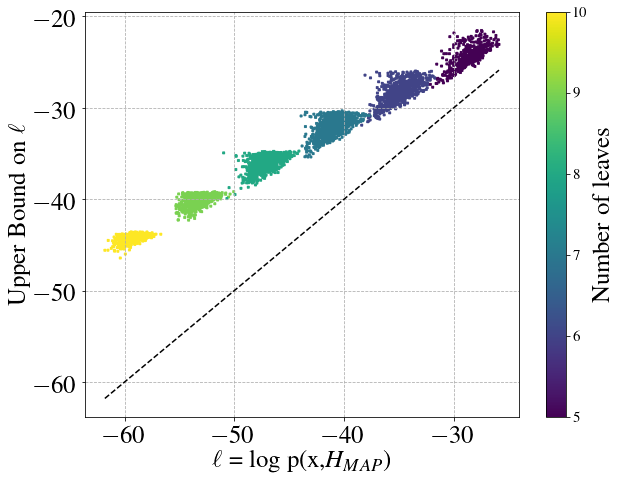

In [43]:
fig2, (axes) = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(8,6)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 5

for i in range(1):
    
    x = np.linspace(min(np.asarray(results["trellis_MLE"])), max(np.asarray(results["trellis_MLE"])), 1000)
    axes.plot(x, x, color="black", linestyle='--')
    
    cl1 = axes.scatter(np.asarray(results["trellis_MLE"]), Bound, c=np.asarray(results["Nleaves"]), marker="X", s=markersize)
    
    cb = fig2.colorbar(cl1, ax=axes, fraction=0.15, shrink=1.0, aspect=20)
    cb.set_label(label="Number of leaves", size=25)
    cb.ax.tick_params(labelsize=15)
    

    cl1.axes.tick_params(labelsize=25) 
#     axes.set_xlabel(r"Trellis MAP $\ell = log p(x,\text{H}_{\text{MAP}})$", fontsize=25)
    axes.set_xlabel(r"$ \ell $ = log p(x,$H_{MAP}$)", fontsize=25)
    axes.set_ylabel(r" Upper Bound on $\ell$", fontsize=25)
    
    axes.grid(which='both', axis='both', linestyle='--')
#     axes[i].set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize = 20)
#     axes.legend(loc='best', fontsize=15)

saveFig=False    
if saveFig:
    fig2.savefig(plotDir+"UpperBoundonLogLH.pdf", bbox_inches='tight')
    
plt.show()

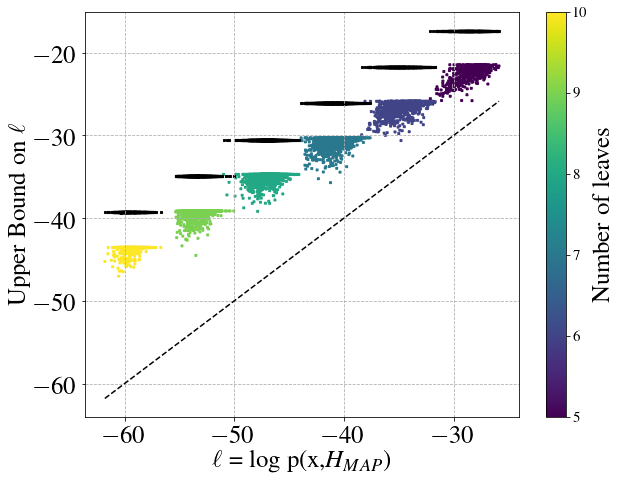

In [80]:
fig2, (axes) = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(8,6)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 5

for i in range(1):
    
    x = np.linspace(min(np.asarray(results["trellis_MLE"])), max(np.asarray(results["trellis_MLE"])), 1000)
    axes.plot(x, x, color="black", linestyle='--')
    
    cl1 = axes.scatter(np.asarray(results["trellis_MLE"]), Bound, c=np.asarray(results["Nleaves"]), marker="X", s=markersize)
    axes.scatter(np.asarray(results["trellis_MLE"]), basic_bound, c='black', marker="X", s=markersize)
    
    cb = fig2.colorbar(cl1, ax=axes, fraction=0.15, shrink=1.0, aspect=20)
    cb.set_label(label="Number of leaves", size=25)
    cb.ax.tick_params(labelsize=15)
    

    cl1.axes.tick_params(labelsize=25) 
#     axes.set_xlabel(r"Trellis MAP $\ell = log p(x,\text{H}_{\text{MAP}})$", fontsize=25)
    axes.set_xlabel(r"$ \ell $ = log p(x,$H_{MAP}$)", fontsize=25)
    axes.set_ylabel(r" Upper Bound on $\ell$", fontsize=25)
    
    axes.grid(which='both', axis='both', linestyle='--')
#     axes[i].set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize = 20)
#     axes.legend(loc='best', fontsize=15)

saveFig=False    
if saveFig:
    fig2.savefig(plotDir+"UpperBoundonLogLH.pdf", bbox_inches='tight')
    
plt.show()

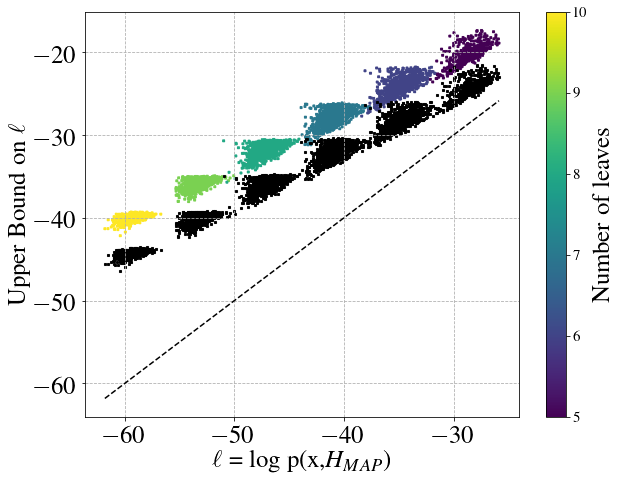

In [45]:
fig2, (axes) = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(8,6)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 5

for i in range(1):
    
    x = np.linspace(min(np.asarray(results["trellis_MLE"])), max(np.asarray(results["trellis_MLE"])), 1000)
    axes.plot(x, x, color="black", linestyle='--')
    
    cl1 = axes.scatter(np.asarray(results["trellis_MLE"]), basic_bound, c=np.asarray(results["Nleaves"]), marker="X", s=markersize)
    axes.scatter(np.asarray(results["trellis_MLE"]), Bound, c='black', marker="X", s=markersize)
    
    cb = fig2.colorbar(cl1, ax=axes, fraction=0.15, shrink=1.0, aspect=20)
    cb.set_label(label="Number of leaves", size=25)
    cb.ax.tick_params(labelsize=15)
    

    cl1.axes.tick_params(labelsize=25) 
#     axes.set_xlabel(r"Trellis MAP $\ell = log p(x,\text{H}_{\text{MAP}})$", fontsize=25)
    axes.set_xlabel(r"$ \ell $ = log p(x,$H_{MAP}$)", fontsize=25)
    axes.set_ylabel(r" Upper Bound on $\ell$", fontsize=25)
    
    axes.grid(which='both', axis='both', linestyle='--')
#     axes[i].set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize = 20)
#     axes.legend(loc='best', fontsize=15)

saveFig=False    
if saveFig:
    fig2.savefig(plotDir+"UpperBoundonLogLH.pdf", bbox_inches='tight')
    
plt.show()

### Average quantities

In [62]:
len(results["trellis_MLE"])

4430

In [63]:
algos = [ 'trellis_MLE', 'bs_llh','gd_llh',  'gt_llh']
for algo in algos:
    print(str(algo) ," = ", np.mean(results[str(algo)]), "+-", np.std(results[str(algo)]))

trellis_MLE  =  -44.117452577901844 +- 9.268461101642783
bs_llh  =  -44.54993573551371 +- 9.513844769341212
gd_llh  =  -45.639119682063466 +- 9.627095562802928
gt_llh  =  -47.381278189525645 +- 10.5317352963611


In [64]:
def getBasicStats(results):
    algos = [ 'trellis_MLE', 'bs_llh', 'gd_llh']
    for rowalgo in algos:
        for colalgo in algos:
    #         print(np.asarray(results[str(rowalgo)])-np.asarray(results[str(colalgo)]))
    #         print(rowalgo,"/",colalgo )
            print(rowalgo,"/",colalgo ," = ", np.mean(np.asarray(results[str(rowalgo)])-np.asarray(results[str(colalgo)])), "+-", np.std(np.asarray(results[str(rowalgo)])-np.asarray(results[str(colalgo)])))

In [65]:
getBasicStats(results)

trellis_MLE / trellis_MLE  =  0.0 +- 0.0
trellis_MLE / bs_llh  =  0.43248315761185785 +- 0.5120776686251568
trellis_MLE / gd_llh  =  1.5216671041616134 +- 1.139760972129449
bs_llh / trellis_MLE  =  -0.43248315761185785 +- 0.5120776686251568
bs_llh / bs_llh  =  0.0 +- 0.0
bs_llh / gd_llh  =  1.0891839465497557 +- 1.1195675860243794
gd_llh / trellis_MLE  =  -1.5216671041616134 +- 1.139760972129449
gd_llh / bs_llh  =  -1.0891839465497557 +- 1.1195675860243794
gd_llh / gd_llh  =  0.0 +- 0.0


In [19]:
def removeOutliers(scores):
#     scores = np.asarray(bg_reject)
    scores = np.asarray(scores)
    p25 = np.percentile(scores, 1 / 5. * 100.)
    p75 = np.percentile(scores, 4 / 5. * 100)

    # Get mean and std for the bg rejection
    robust_mean = np.mean([scores[i] for i in range(len(scores)) if p25 <= scores[i] <= p75])
    robust_std = np.std([scores[i] for i in range(len(scores)) if p25 <= scores[i] <= p75])


    indices = [i for i in range(len(scores)) if robust_mean - 3*robust_std <= scores[i] <= robust_mean + 3*robust_std]

    new_scores=scores[indices]

    return new_scores

In [20]:
rmOut={}
algos = [ 'trellis_MLE', 'bs_llh', 'gd_llh']
for rowalgo in algos:
    for colalgo in algos:
     rmOut[rowalgo+"/"+colalgo] = removeOutliers(np.asarray(results[str(rowalgo)])-np.asarray(results[str(colalgo)]))

In [21]:
def getStats(results):
    for key in results.keys():
        print(key, np.mean(results[key]), "+-",np.std(results[key]))

In [22]:
getStats(rmOut)

trellis_MLE/trellis_MLE 0.0 +- 0.0
trellis_MLE/bs_llh 101.78805891185063 +- 45.64927975678063
trellis_MLE/gd_llh 98.56245765847723 +- 38.5590811183189
bs_llh/trellis_MLE -101.78805891185063 +- 45.64927975678063
bs_llh/bs_llh 0.0 +- 0.0
bs_llh/gd_llh -0.5501274744140213 +- 22.030789064639563
gd_llh/trellis_MLE -98.56245765847723 +- 38.5590811183189
gd_llh/bs_llh 0.5501274744140213 +- 22.030789064639563
gd_llh/gd_llh 0.0 +- 0.0


### Partition Function plots

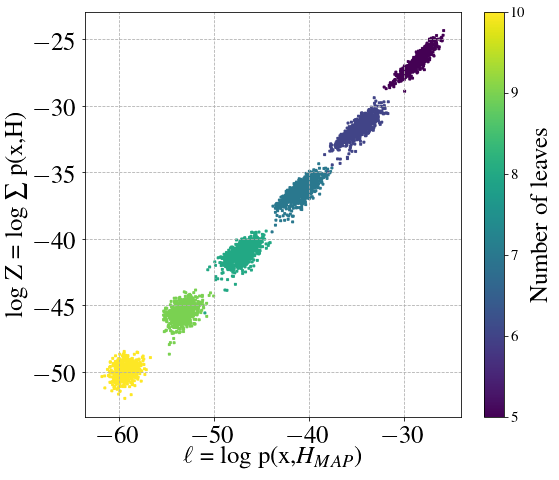

In [66]:
fig2, (axes) = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(7,6)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 5

for i in range(1):
    
#     x = np.linspace(min(np.asarray(results["trellis_MLE"])), max(np.asarray(results["trellis_MLE"])), 1000)
#     axes.plot(x, x, color="black", linestyle='--')
    
    cl1 = axes.scatter(np.asarray(results["trellis_MLE"]), np.asarray(results["Z"]), c=np.asarray(results["Nleaves"]), marker="X", s=markersize)
    
    cb = fig2.colorbar(cl1, ax=axes, fraction=0.15, shrink=1.0, aspect=20)
    cb.set_label(label="Number of leaves", size=25)
    cb.ax.tick_params(labelsize=15)
    

    cl1.axes.tick_params(labelsize=25) 
#     axes.set_xlabel(r"Trellis MAP $\ell = log p(x,\text{H}_{\text{MAP}})$", fontsize=25)
    axes.set_xlabel(r"$ \ell $ = log p(x,$H_{MAP}$)", fontsize=25)
    axes.set_ylabel(r" log Z = log $\sum$ p(x,H)", fontsize=25)
    
    axes.grid(which='both', axis='both', linestyle='--')
#     axes[i].set_title(r""+jetLabels[i][0:-4]+" "+jetLabels[i][-4::], fontsize = 20)
#     axes.legend(loc='best', fontsize=15)

saveFig=True    
if saveFig:
    fig2.savefig(plotDir+"ZvsMLEscatter.pdf", bbox_inches='tight')
    
plt.show()

### Likelihood plots

In [31]:
 min(results["trellis_MLE"])

-61.804743225562504

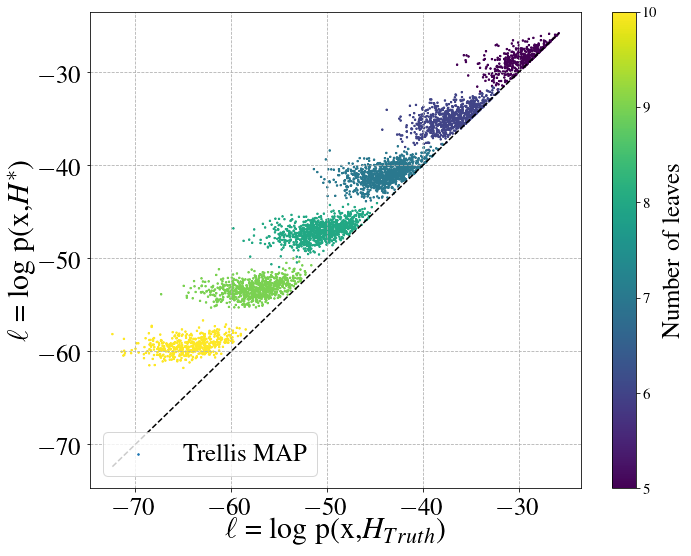

In [20]:
fig2, (axes) = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(9,7)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 2

for i in range(1):
    
     
    x = np.linspace(min(results["gt_llh"]), max(results["trellis_MLE"]), 1000)
    
#     axes.scatter(results["gt_llh"], results["gd_llh"], color="red", marker="X", s=markersize, label="Greedy")
#     axes.scatter(results["gt_llh"], results["bs_llh"], color='green', marker="o", s=markersize, label="Beam Search")
    cl1 = axes.scatter(np.asarray(results["gt_llh"]), np.asarray(results["trellis_MLE"]), c=np.asarray(results["Nleaves"]) ,  marker="X", s=markersize, label="Trellis MAP")
    
    cb = fig2.colorbar(cl1, ax=axes, fraction=0.15, shrink=1.0, aspect=20)
    cb.set_label(label="Number of leaves", size=25)
    cb.ax.tick_params(labelsize=15)
    
#     cl1 = axes.scatter(results["gt_llh"], results["trellis_MLE"],  c=results["Nleaves"],  marker="X", s=markersize, label="Trellis MLE")
#     fig2.colorbar(cl1, ax=axes, label="Number of leaves")

    axes.tick_params(labelsize=25) 
    axes.plot(x, x, color="black", linestyle='--')
#     axes.set_xlabel(r"Ground Truth Jet [logLH]", fontsize=20)
#     axes.set_ylabel(r"Clustered Jet [logLH]", fontsize=20)
#     axes.set_xlim(left=-30, right=-29)
#     axes.set_ylim(bottom=-30, top=-29)
    axes.grid(which='both', axis='both', linestyle='--')
    axes.legend(loc='lower left', fontsize=25)
#     cb.ax.tick_params(labelsize=15)
    
    axes.set_xlabel(r"$ \ell $ = log p(x,$H_{Truth}$)", fontsize=30)
    axes.set_ylabel(r" $ \ell $ = log p(x,$H^*$)", fontsize=30)

saveFig=False    
if saveFig:
    fig2.savefig(plotDir+"llhScatter.pdf", bbox_inches='tight')
    
plt.show()

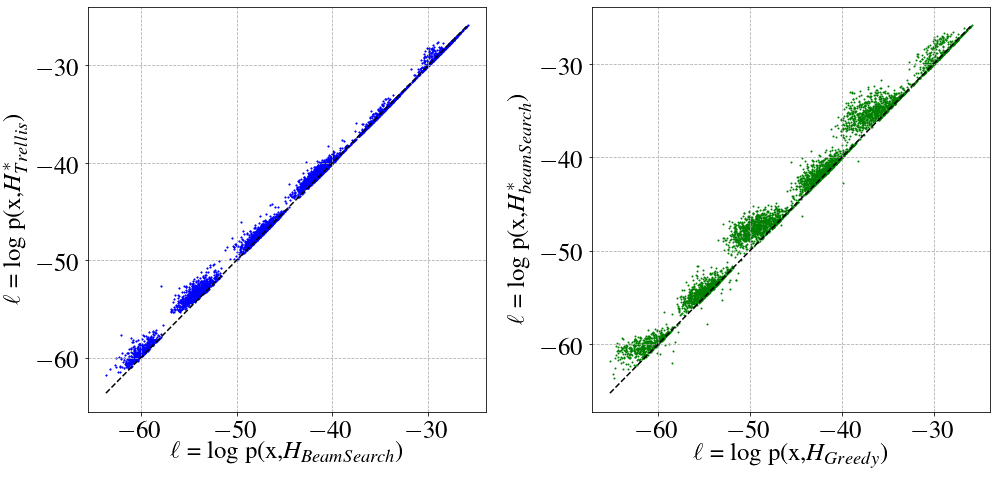

In [68]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(13,6)
plt.tight_layout(pad=0.4, w_pad=8, h_pad=1.0)
markersize = 1

for i in range(1):
    
     
    x = np.linspace(min(results["bs_llh"]), max(results["trellis_MLE"]), 1000)
    
    axes[0].scatter(np.asarray(results["bs_llh"]), np.asarray(results["trellis_MLE"]),  color='blue',  marker="X", s=markersize, label="Trellis MAP")
#     axes[0].scatter(results["gt_llh"], results["bs_llh"], color='green', marker="o", s=markersize, label="Beam Search")
#     axes[0].scatter(results["gt_llh"], results["gd_llh"], color="red", marker="X", s=markersize, label="Greedy")
#     cl1 = axes.scatter(results["gt_llh"], results["trellis_MLE"],  c=results["Nleaves"],  marker="X", s=markersize, label="Trellis MLE")
#     fig2.colorbar(cl1, ax=axes, label="Number of leaves")

    axes[0].tick_params(labelsize=25) 
    axes[0].plot(x, x, color="black", linestyle='--')
    axes[0].set_xlabel(r"$ \ell $ = log p(x,$H_{BeamSearch}$)", fontsize=25)
    axes[0].set_ylabel(r"$ \ell $ = log p(x,$H^*_{Trellis}$)", fontsize=25)
#     axes[0].set_xlim(left=-15, right=10)
    axes[0].grid(which='both', axis='both', linestyle='--')
#     axes[0].legend(loc='lower left', fontsize=25)
    
    x = np.linspace(min(results["gd_llh"]), max(results["bs_llh"]), 1000)
    
    
#     axes[1].scatter(np.asarray(results["gt_llh"]), np.asarray(results["trellis_MLE"]),  color='blue',  marker="X", s=markersize, label="Trellis MAP")
    axes[1].scatter(results["gd_llh"], results["bs_llh"], color='green', marker="o", s=markersize, label="Beam Search")
#     axes[1].scatter(results["gt_llh"], results["gd_llh"], color="red", marker="X", s=markersize, label="Greedy")
#     cl1 = axes.scatter(results["gt_llh"], results["trellis_MLE"],  c=results["Nleaves"],  marker="X", s=markersize, label="Trellis MLE")
#     fig2.colorbar(cl1, ax=axes, label="Number of leaves")

    axes[1].tick_params(labelsize=25) 
    axes[1].plot(x, x, color="black", linestyle='--')
    axes[1].set_xlabel(r"$ \ell $ = log p(x,$H_{Greedy}$)", fontsize=25)
    axes[1].set_ylabel(r"$ \ell $ = log p(x,$H^*_{beam Search}$)", fontsize=25)
#     axes[1].set_xlim(left=-15, right=10)
    axes[1].grid(which='both', axis='both', linestyle='--')
#     axes[1].legend(loc='lower left', fontsize=25)

saveFig=False    
if saveFig:
    fig2.savefig(plotDir+"llhScatter.pdf", bbox_inches='tight')
    
plt.show()

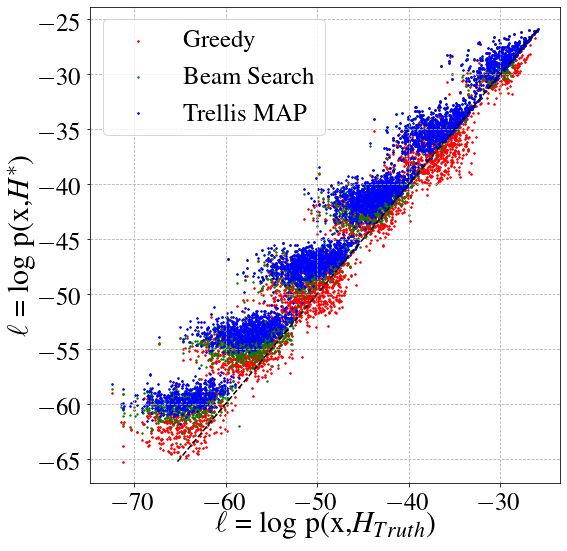

In [26]:
fig2, (axes) = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(7,7)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 2

for i in range(1):
    
     
    x = np.linspace(min(results["gd_llh"]), max(results["trellis_MLE"]), 1000)
    
    axes.scatter(results["gt_llh"], results["gd_llh"], color="red", marker="X", s=markersize, label="Greedy")
    axes.scatter(results["gt_llh"], results["bs_llh"], color='green', marker="o", s=markersize, label="Beam Search")
    axes.scatter(np.asarray(results["gt_llh"]), np.asarray(results["trellis_MLE"]),  color='blue',  marker="X", s=markersize, label="Trellis MAP")
    
    
#     cl1 = axes.scatter(results["gt_llh"], results["trellis_MLE"],  c=results["Nleaves"],  marker="X", s=markersize, label="Trellis MLE")
#     fig2.colorbar(cl1, ax=axes, label="Number of leaves")

    axes.tick_params(labelsize=25) 
    axes.plot(x, x, color="black", linestyle='--')
#     axes.set_xlabel(r"Ground Truth Jet [logLH]", fontsize=20)
#     axes.set_ylabel(r"Clustered Jet [logLH]", fontsize=20)
#     axes.set_xlim(left=-15, right=10)
    axes.grid(which='both', axis='both', linestyle='--')
    axes.legend(loc='upper left', fontsize=25)
#     cb.ax.tick_params(labelsize=15)
    
    axes.set_xlabel(r"$ \ell $ = log p(x,$H_{Truth}$)", fontsize=30)
    axes.set_ylabel(r" $ \ell $ = log p(x,$H^*$)", fontsize=30)

saveFig=False    
if saveFig:
    fig2.savefig(plotDir+"llhScatter.pdf", bbox_inches='tight')
    
plt.show()

# Posterior distribution from sampling

In [19]:
from utils import get_logger
logger = get_logger(level=logging.WARNING)

In [20]:
def trainTestSplit(gt_jets,
                   bs_jets,
                   greedy_jets, 
                   TrainTestRatio = 0.8 ,
                   NleavesMin = 9
                  ):
    """ Keep only trees with leaves between NleavesMin and NleavesMax"""
    smallJetIndex =[i for i,gt_jet in enumerate(gt_jets)  if NleavesMin<=len(gt_jet["leaves"])<NleavesMin+1]
    
    if len(smallJetIndex)>0:
    
        train_gt = np.asarray(gt_jets)[smallJetIndex[0:int(TrainTestRatio*len(smallJetIndex))]]
        test_gt = np.asarray(gt_jets)[smallJetIndex[int(TrainTestRatio*len(smallJetIndex))::]]
        test_BSO_jet = np.asarray(bs_jets)[smallJetIndex[int(TrainTestRatio*len(smallJetIndex))::]]  
        test_Greedy_jet = np.asarray(greedy_jets)[smallJetIndex[int(TrainTestRatio*len(smallJetIndex))::]]  
        
    else:
        print("There are no jets in the dataset with the required number of leaves ")
        
    return train_gt, test_gt, test_BSO_jet, test_Greedy_jet

In [21]:
# NleavesMin=9

# train_gt, test_gt, test_BSO_jet, test_Greedy_jet = trainTestSplit(gt_jets,
#                    bs_jets,
#                    greedy_jets, 
#                    TrainTestRatio = 0.8 ,
#                     NleavesMin = NleavesMin,
#                   )

In [22]:
def posteriorDist( gt_jets, 
                  bs_jets, 
                  greedy_jets,
                  Nsamples = 1,
                  NleavesMin =9,
                  NleavesMax=10, 
                  MaxNjets = 1):
    """Sample trees to build the posterior distribution"""

    """Create and fill trellis"""
    results, trellis =  runTrellis(gt_jets, 
               bs_jets, 
               greedy_jets,
               NleavesMin =NleavesMin, 
               NleavesMax= NleavesMax, 
               MaxNjets = MaxNjets)
    
    
    """Sampling"""
    treedist = np.asarray(trellis.sample_trees(trellis.root, Nsamples))
    
    treedistLH = np.exp(treedist)
    
    return results, treedist, treedistLH

In [23]:
importlib.reload(hierarchical_trellis_node)
importlib.reload(jet_node)
importlib.reload(hierarchical_trellis)
importlib.reload(jet_trellis)
importlib.reload(rpe)

<module 'run_physics_experiment_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/hierarchical-trellis/src/run_physics_experiment_invM.py'>

In [24]:
logger = get_logger(level=logging.WARNING)

In [25]:
# For testing
Nsamples = 1
NleavesMin =8
NleavesMax=9
# MaxNjets = 1

resultsPost , treedist, treedistLH = posteriorDist(test_gt, 
                                                   test_BSO_jet,
                                                   test_Greedy_jet,
                  Nsamples = Nsamples,
                  NleavesMin =NleavesMin,
                  NleavesMax=NleavesMax, 
                  MaxNjets = 1)

NameError: name 'test_gt' is not defined

In [53]:
def savePosterior(treedist,resultsPost, Nsamples = Nsamples, NleavesMin=NleavesMin, NleavesMax=NleavesMax, Nstart=""):
#     outdir = "../../Simulation-driven-Hierarchical-Trellis/src/experiments/"
    outdir = "../../hierarchical-trellis/src/experiments/"
    out_filename = os.path.join(outdir, "PosteriorInvM_ExactGraph"+label+"_Samples_"+str(Nsamples)+"_"+str(NleavesMin)+"_"+str(Nstart)+".pkl")
    
    with open(out_filename, "wb") as f:
        pickle.dump((treedist,resultsPost), f, protocol=2)

In [50]:
def loadPosterior(Nsamples = None,NleavesMin=None,NleavesMax=None, Nstart=""):

    outdir = "experiments/"

    in_filename = os.path.join(outdir, "PosteriorInvM_"+label+"_Samples_"+str(Nsamples)+"_"+str(NleavesMin)+"_"+str(NleavesMax)+str(Nstart)+".pkl")
    with open(in_filename, "rb") as fd:
        treedist,resultsPost = pickle.load(fd, encoding='latin-1')
    return  treedist,resultsPost

### Plots

In [26]:
def perBinLH(treedist, edges):
    """ Add the likelihood of all trees that fall within a bin"""
    treedistLH = np.exp(treedist)
    binLH = []
    for i in range(len(edges)-1):
        temp=0
        for m in range(len(treedist)):
            if edges[i]<treedist[m]<edges[i+1]:
                temp+=treedistLH[m]
        binLH.append(temp)
        
    return np.asarray(binLH)

In [27]:
def posteriorHist(treedist, resultsPost, bins=10):
    
    fig2 = plt.figure()
    gs = fig2.add_gridspec(2, 1, height_ratios=[8, 0.9]) 
    # gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 

    fig2, (axes) = plt.subplots(nrows=1, ncols=1)
    fig2.set_size_inches(8, 8)
    plt.tight_layout(pad=0.4, w_pad=5, h_pad=5.0)
    markersize = 200
     
    axes0 = plt.subplot(gs[0])    
    
    pdf, edges = np.histogram(treedist, density=True, bins=bins)
#     print(pdf)    
    edgesCenter = [(edges[i+1]+edges[i])/2 for i in range(len(edges)-1)]

    err = np.sqrt(pdf/len(treedist)/(bins[-1]-bins[-2]))

    axes0.errorbar(edgesCenter, pdf, marker="o", yerr=err, color = "black",linestyle ="",  drawstyle = 'steps-mid', label="Sampled")

    
    
    LHset = np.asarray(list(set(treedist)))
    newData = perBinLH(LHset, edges)/np.exp(resultsPost["Z"])

    
    axes0.bar(edgesCenter,newData/ (bins[-1]-bins[-2]),width = (bins[-1]-bins[-2]), color="green", alpha=0.8, label="Expected")
    
    axes0.axvline(resultsPost["gt_llh"][0], color='red', linestyle='dashed', linewidth=3, label = "Ground Truth")
    
    axes0.grid(which='both', axis='both', linestyle='--')
    axes0.tick_params(labelsize=25) 
    axes0.legend(loc='upper left', fontsize=25)
    axes0.set_xlabel(r" $ \ell $ = log p(x,H)", fontsize=30)
    axes0.set_ylabel(r"p($\ell \,|$ x) ", fontsize=30)


    saveFig=True    
    if saveFig:
        fig2.savefig(plotDir+"posteriorSample"+str(Nsamples)+"_"+str(NleavesMin)+"_"+str(NleavesMax)+".pdf", bbox_inches='tight')
    
#     plt.show()

In [28]:
len(test_gt)

NameError: name 'test_gt' is not defined

In [37]:
Nstart = 2000
test_gt = np.asarray(gt_jets[Nstart::])
test_bs = np.asarray(bs_jets[Nstart::])
test_gd = np.asarray(greedy_jets[Nstart::])

In [30]:
test_gt[0]["sumlogLH"]

-31.49799370765686

In [43]:
Nsamples = 100000
NleavesMin =5
NleavesMax=6
# MaxNjets = 1
Nstart = 0

resultsPost , treedist, treedistLH = posteriorDist( test_gt[Nstart::], 
                  test_bs[Nstart::], 
                  test_gd[Nstart::],
                  Nsamples = Nsamples,
                  NleavesMin =NleavesMin,
                  NleavesMax=NleavesMax, 
                  MaxNjets = 1)

Creating trellis for jet # 0


In [54]:
savePosterior(treedist,resultsPost, Nsamples = Nsamples, NleavesMin=NleavesMin, NleavesMax=NleavesMax, Nstart = str(Nstart))

In [27]:
treedist, resultsPost =  loadPosterior(Nsamples = Nsamples,  NleavesMin=NleavesMin, NleavesMax=NleavesMax, Nstart=Nstart)

<Figure size 432x288 with 0 Axes>

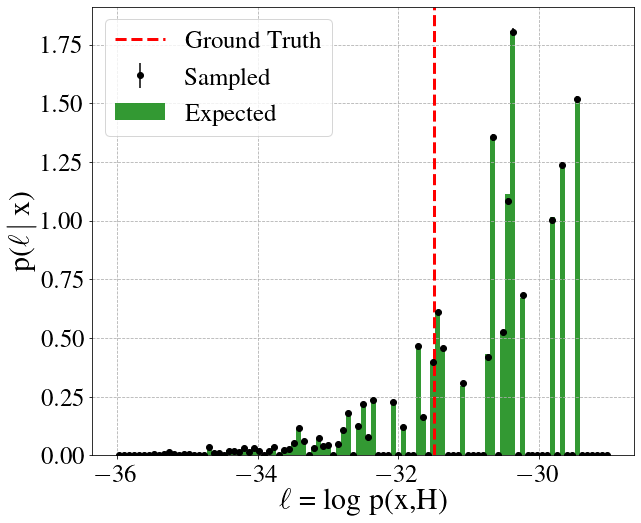

In [55]:
posteriorHist(treedist,  resultsPost, bins = np.linspace(-36,-29,num =100))

In [33]:
Nsamples = 10
NleavesMin =9
NleavesMax=10
# MaxNjets = 1
Nstart = 0


start = time.time()

resultsPost , treedist, treedistLH = posteriorDist( test_gt[Nstart::], 
                  test_bs[Nstart::], 
                  test_gd[Nstart::],
                  Nsamples = Nsamples,
                  NleavesMin =NleavesMin,
                  NleavesMax=NleavesMax, 
                  MaxNjets = 1)


end = time.time()-start

TypeError: list indices must be integers or slices, not list

In [50]:
end/1000

0.06310049700737

## Sample Tree logLH and dictionary

In [48]:
def posteriorTrees( gt_jets, 
                  bs_jets, 
                  greedy_jets,
                  Nsamples = 1,
                  NleavesMin =9,
                  NleavesMax=10, 
                  MaxNjets = 1):
    """Sample trees to build the posterior distribution"""

    """Create and fill trellis"""
    results, trellis =  runTrellis(gt_jets, 
               bs_jets, 
               greedy_jets,
               NleavesMin =NleavesMin, 
               NleavesMax= NleavesMax, 
               MaxNjets = MaxNjets)
    
    
    """Sampling"""
    treedist, jetdist = np.asarray(trellis.sampleTree(trellis.root, Nsamples))
    
#     treedistLH = np.exp(treedist)
    
    return results, treedist, jetdist

In [192]:
importlib.reload(hierarchical_trellis_node)
importlib.reload(jet_node)
importlib.reload(hierarchical_trellis)
importlib.reload(jet_trellis)
importlib.reload(rpe)

<module 'run_physics_experiment_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/hierarchical-trellis/src/run_physics_experiment_invM.py'>

In [193]:
logger = get_logger(level=logging.WARNING)

In [196]:
# For testing
Nsamples = 1
NleavesMin =9
NleavesMax=10
# MaxNjets = 1

start =time.time()

resultsPost , treedist, jetdist = posteriorTrees( gt_jets, 
                  bs_jets, 
                  greedy_jets,
                  Nsamples = Nsamples,
                  NleavesMin =NleavesMin,
                  NleavesMax=NleavesMax, 
                  MaxNjets = 1)

print("Tot_time = ",time.time()-start)

Creating trellis for jet # 0
Tot_time =  1.667536735534668


In [181]:
len(jetdist[0]["leaves"])

9

In [182]:
[sum(jetdist[i]["logLH"]) for i in range(len(jetdist))]

[-56.15912098535465]

In [183]:
jetdist[0]["leaves"]

array([[150.28670557,  91.454086  ,  86.32935603,  82.1809349 ],
       [  3.04718527,   1.89997253,   1.74872138,   1.6162211 ],
       [  6.91591023,   4.24317273,   3.90854673,   3.810552  ],
       [ 69.31191398,  39.36957628,  39.57004844,  40.99284443],
       [ 20.42856902,  13.72615669,  10.09770702,  11.25179847],
       [100.73261558,  52.44697441,  60.41086757,  61.16588593],
       [ 16.80851689,   9.98290325,  10.19013404,   8.88550465],
       [ 11.30351647,   6.11806067,   5.68455702,   7.53482518],
       [ 22.28848456,  11.69920243,  13.00016666,  13.50153816]])

## MAP jet

In [177]:
def buildMAPjet(gt_jets, 
                  bs_jets, 
                  greedy_jets,
                  NleavesMin =9,
                  NleavesMax=10, 
                  MaxNjets = 1):
    
    results, trellis =  runTrellis(gt_jets, 
                   bs_jets, 
                   greedy_jets,
                   NleavesMin =NleavesMin, 
                   NleavesMax= NleavesMax, 
                   MaxNjets = MaxNjets)

    MAPjet= trellis.traverseMAPtree(trellis.root)

    return MAPjet

In [178]:
NleavesMin =9
NleavesMax=10
MaxNjets = 1

start = time.time()

MAPjet = buildMAPjet(gt_jets, 
                  bs_jets, 
                  greedy_jets,
                  NleavesMin = NleavesMin,
                  NleavesMax = NleavesMax, 
                  MaxNjets = MaxNjets)

print("Tot_time = ",time.time()-start)

Creating trellis for jet # 0
Tot_time =  1.5333588123321533


In [179]:
MAPjet["logLH"]

-52.601919336416344

## Tree multiplicity vs Number of leaves

In [184]:
def Ntrees(Nleaves):
    Tot=1
    for k in range(2*Nleaves-3,1,-2):
        Tot*=k
    return Tot

In [185]:
for m in range(3,20):
    print(Ntrees(m))

3
15
105
945
10395
135135
2027025
34459425
654729075
13749310575
316234143225
7905853580625
213458046676875
6190283353629375
191898783962510625
6332659870762850625
221643095476699771875


In [187]:
# Timing:

In [188]:
1.5/3600 * 10**6   *0.1/2000# There should be a speed up from going to c++ and pararelizing

0.020833333333333336

In [302]:
Ntrees=[]
UniqueList = []
for i in range(2000,20000,2000):
    Ntrees.append(i)
    UniqueList.append(len(list(set(treedist[0:i]))))

Text(0.5, 0, 'Number of samples')

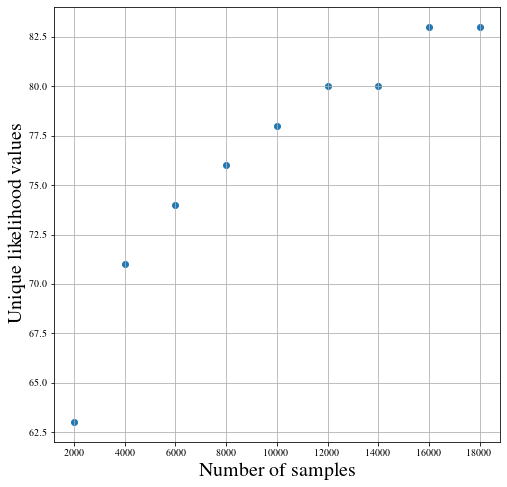

In [303]:
plt.scatter(Ntrees,UniqueList)
plt.grid()
plt.ylabel(r"Unique likelihood values  ", fontsize=20)
plt.xlabel(r"Number of samples",fontsize=20)

In [300]:
Ntrees=[]
UniqueList = []
for i in range(10000,300000,10000):
    Ntrees.append(i)
    UniqueList.append(len(list(set(treedist[0:i]))))

Text(0.5, 0, 'Number of samples')

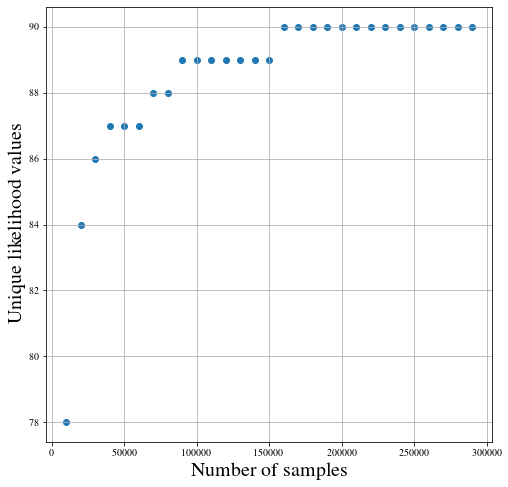

In [301]:
plt.scatter(Ntrees,UniqueList)
plt.grid()
plt.ylabel(r"Unique likelihood values  ", fontsize=20)
plt.xlabel(r"Number of samples",fontsize=20)

3